**Exercise 7: K-means Clustering and Principal Component Analysis**

In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import scipy
from random import randint
from scipy.io import loadmat
from math import sqrt
from __future__ import division
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_style("darkgrid")

## **Part 1: K means Clustering**

In [3]:
d2 = loadmat('ex7data2.mat')
X2 = np.array(d2['X'])

In [4]:
def find_closest_centroids(X, centroids):
    c_      = np.tile(centroids, (X.shape[0], 1))
    x_      = np.repeat(X, centroids.shape[0], axis=0)
    d       = (x_ - c_)
    sq      = np.sum(d**2, axis=1)
    closest = np.zeros(X.shape[0])
    
    for i in np.arange(0, X.shape[0]):
        closest[i] = np.argmin(sq[i*centroids.shape[0]:(i+1)*centroids.shape[0]])
    return closest

# Testing, answer should be 1,3,2 with 1 indexing, i.e. 0,2,1 in python
find_closest_centroids(X2[0:3], np.array([[3, 3], [6, 2], [8, 5]]))

array([ 0.,  2.,  1.])

In [5]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in np.arange(K):
        selected = X[idx == i]
        if selected.shape[0] > 0: 
            centroids[i] = np.sum(selected, axis=0)/selected.shape[0]
        else:
            centroids[i] = -1
        
    return centroids[centroids >= 0].reshape(-1, centroids.shape[1])

# Testing
init_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3
idx = find_closest_centroids(X2, init_centroids)
compute_centroids(X2, idx, K)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

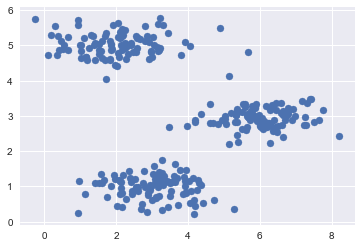

In [6]:
plt.scatter(X2[:, 0], X2[:, 1])

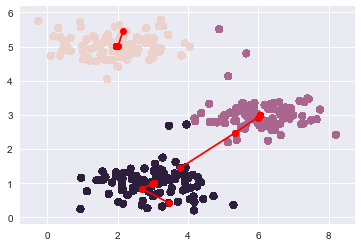

In [7]:
def plot_K_data(X, idx, K):
    cmap = sns.cubehelix_palette(K, as_cmap=True)
    plt.scatter(X2[:, 0], X2[:, 1], c=idx, cmap=cmap)

    
def plot_K_means(X, idx, current, previous, K):
    plot_K_data(X, idx, K)
    for i in np.arange(K):
        plt.plot(np.r_[previous[i, 0], current[i,0]], np.r_[previous[i,1], current[i,1]], marker='o', color='r')

        
def rand_init(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False), :]


def run_K_means(X, initial_centroids, max_iters, plot_progress):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    for i in np.arange(0, max_iters):
        idx = find_closest_centroids(X, centroids)
        previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
        K = centroids.shape[0]
        
        if plot_progress:
            plot_K_means(X, idx, centroids, np.array(previous_centroids), K)
        
    return centroids, idx

plot_K_data(X2, idx.astype(int), 3)
c, idx = run_K_means(X2, rand_init(X2, 3), 300, True)

### **Image Compression**

In [8]:
img = loadmat('bird_small.mat')['A']
a = img/255
linimg = a.reshape(-1, 3)

In [9]:
colors, colordx = run_K_means(linimg, rand_init(linimg, 16), 300, False)

In [10]:
kmeans = KMeans(16)
fitted = kmeans.fit(linimg)
print fitted

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


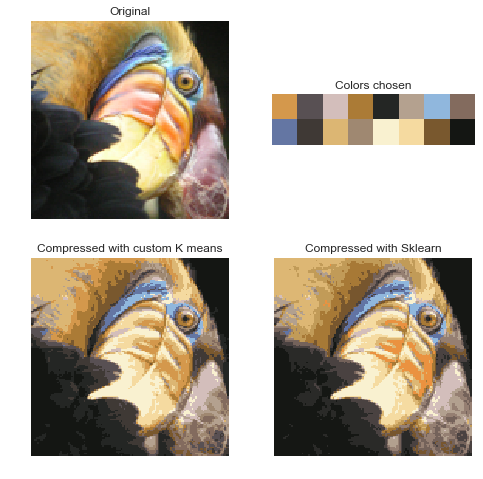

In [11]:
fig = plt.figure(figsize=(8, 8))
fig.add_axes()
ax = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax.imshow(img)
ax.axis('off')
ax.set_title('Original')

ax1.imshow(colors.reshape(-1, 8, 3))
ax1.axis('off')
ax1.set_title('Colors chosen')

ax2.imshow(colors[colordx.astype(int)].reshape(-1, 128, 3))
ax2.axis('off')
ax2.set_title('Compressed with custom K means')

ff = fitted.cluster_centers_[fitted.labels_].reshape(-1, 128, 3)

ax3.imshow(ff)
ax3.axis('off')
ax3.set_title('Compressed with Sklearn')

## **Part 2: Principal Component Analysis **

(50, 2)


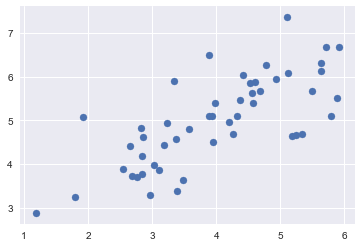

In [12]:
pca = loadmat('ex7data1.mat')
Xp = pca['X']
print Xp.shape

plt.scatter(Xp[:, 0], Xp[:, 1], marker='o')

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[ 1.73553038  0.26446962]


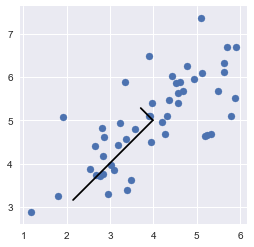

In [13]:
def compute_pca(X):
    m, n = X.shape
    scale = StandardScaler()
    Np = scale.fit_transform(X)

    sig = (1/m) * Np.T.dot(Np)
    return np.linalg.svd(sig.T)

U, S, V = compute_pca(Xp)
print U
print S

mux, muy = Xp[:, 0].mean(), Xp[:, 1].mean()
plt.gca().set_aspect('equal')

plt.plot(np.r_[mux, mux + 1.5 * S[0] * U[0,0]], 
         np.r_[muy, muy + 1.5 * S[0] * U[1,0]], color='k')

plt.plot(np.r_[mux, mux + 1.5 * S[1] * U[0,1]],
         np.r_[muy, muy + 1.5 * S[1] * U[1,1]], color='k')

plt.scatter(Xp[:, 0], Xp[:, 1], marker='o')

0.0699590079169
[[ 3.38533768  3.38533768]
 [ 5.19102674  5.19102674]
 [ 3.53383829  3.53383829]
 [ 3.24032416  3.24032416]
 [ 3.51103328  3.51103328]]
[[ 3.38156267  3.38911268]
 [ 4.52787538  5.8541781 ]
 [ 2.65568187  4.41199472]
 [ 2.76523467  3.71541365]
 [ 2.84656011  4.17550645]]


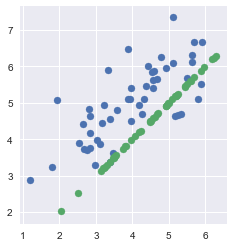

In [14]:
def project_data(U, X, k):
    return U[:, :k].T.dot(X.T).T

def recover_data(U, Z, k):
    return U[:, :k].dot(Z.T).T

mXp = project_data(U, Xp, 1)
recover = recover_data(U, mXp, 1)

print np.linalg.norm(recover - Xp) / np.linalg.norm(recover + Xp)
print recover[:5]
print Xp[:5]

plt.gca().set_aspect('equal')
plt.scatter(Xp[:,0], Xp[:, 1])
plt.scatter(recover[:, 0], recover[:, 1])

### **Faces Compression**

(5000, 1024)
(5, 32, 32)


(-0.5, 159.5, 31.5, -0.5)

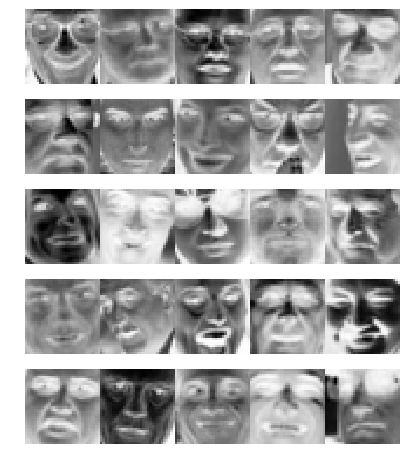

In [15]:
faces = loadmat('ex7faces.mat')
Xf = faces['X']

print Xf.shape
print Xf[:5].reshape(5, 32, 32).shape
fig = plt.figure(figsize=(8, 8))
fig.add_axes()
for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    ax.imshow(Xf[i*5:(i+1)*5].reshape(-1, 32).T)
    ax.grid('off')
    ax.axis('off')
    
plt.axis('off')

In [16]:
U, S, V = compute_pca(Xf)

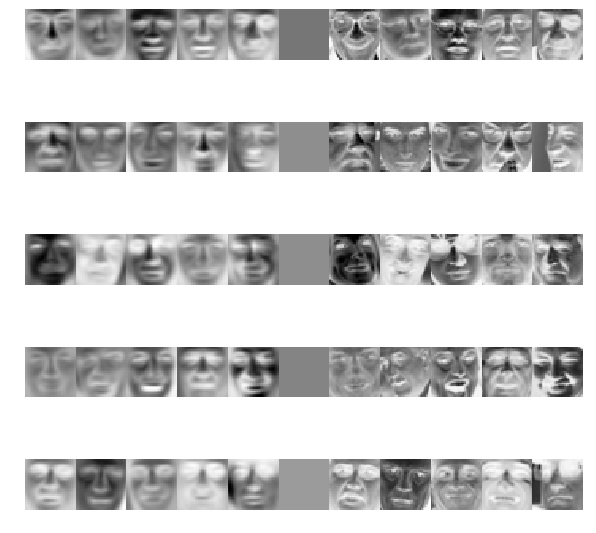

In [17]:
dims = 40
Z = project_data(U, Xf, dims)
R = recover_data(U, Z, dims)

fig = plt.figure(figsize=(10, 10))
fig.add_axes()

for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    ax.imshow(np.c_[R[i*5:(i+1)*5].reshape(-1, 32).T, np.zeros((32, 32)), Xf[i*5:(i+1)*5].reshape(-1, 32).T])
    ax.grid('off')
    ax.axis('off')

## **Part 3: PCA Visualization**

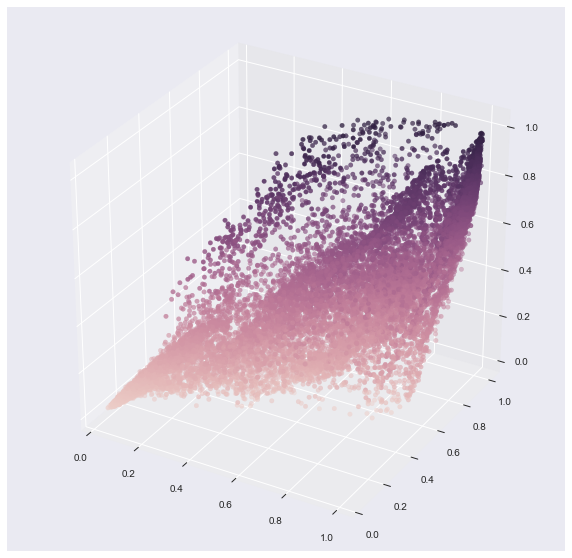

In [37]:
fig = plt.figure(figsize=(10, 10))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.scatter(linimg[:, 0], linimg[:, 1], linimg[:, 2], cmap=sns.cubehelix_palette(220, as_cmap=True), c=linimg[:, 2])

'''
Nice plotly graph that render offline below
'''
# trace1 = go.Scatter3d(
#     x=linimg[:, 0],
#     y=linimg[:, 1],
#     z=linimg[:, 2],
#     mode='markers',
#     marker=dict(
#         size=8,
#         color=linimg[:, 2],                
#         colorscale='Viridis',   
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

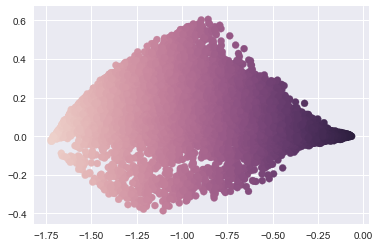

In [39]:
U, S, V = compute_pca(linimg)
Z = project_data(U, linimg, 2)
plt.scatter(Z[:, 0], Z[:, 1], cmap=sns.cubehelix_palette(220, as_cmap=True), c=Z[:, 0])

# trace1 = go.Scatter(
#     y = Z[:, 1],
#     x = Z[:, 0],
#     mode='markers',
#     marker=dict(
#         size='10',
#         color = Z[:, 0],
#         colorscale='Viridis',
#     )
# )

# data = [trace1]

# py.iplot(data)